## Import necessary libraries for data handling, visualization, modeling, and evaluation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Load preprocessed training, validation, and test datasets


In [9]:
# Load data
X_train = np.load('./data/X_train.npy')
Y_train = np.load('./data/Y_train.npy')
X_valid = np.load('./data/X_valid.npy')
Y_valid = np.load('./data/Y_valid.npy')
X_test = np.load('./data/X_test.npy')
Y_test = np.load('./data/Y_test.npy')

## Define the Convolutional Neural Network (CNN) architecture


In [10]:
# Really small model
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


## Compile the CNN model, set up early stopping, and train the model


In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

# Train model
history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.7414 - loss: 0.5302 - val_accuracy: 0.9235 - val_loss: 0.3176
Epoch 2/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9187 - loss: 0.2962 - val_accuracy: 0.9325 - val_loss: 0.2414
Epoch 3/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9280 - loss: 0.2358 - val_accuracy: 0.9363 - val_loss: 0.2070
Epoch 4/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.9354 - loss: 0.2021 - val_accuracy: 0.9190 - val_loss: 0.2465
Epoch 5/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9399 - loss: 0.1833 - val_accuracy: 0.9329 - val_loss: 0.1959
Epoch 6/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9495 - loss: 0.1585 - val_accuracy: 0.9359 - val_loss: 0.1914
Epoch 7/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9589 - loss: 0.1350 - val_accuracy: 0.9337 - val_loss: 0.2033
Epoch 8/100
946/946 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9619 - loss: 0

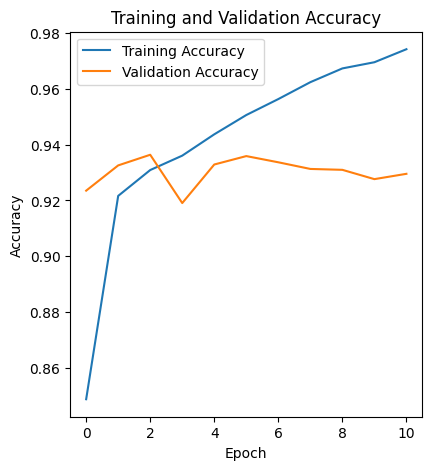

In [16]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


### Training
* Learning efficiently
* Val accuracy not improving after epoch 5
* Early stopping triggered at epoch 10

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 31752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │       254,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 762,773 (2.91 MB)

 Trainable params: 254,257 (993.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 508,516 (1.94 MB)


Number of misclassified images: 338

Misclassified Images:


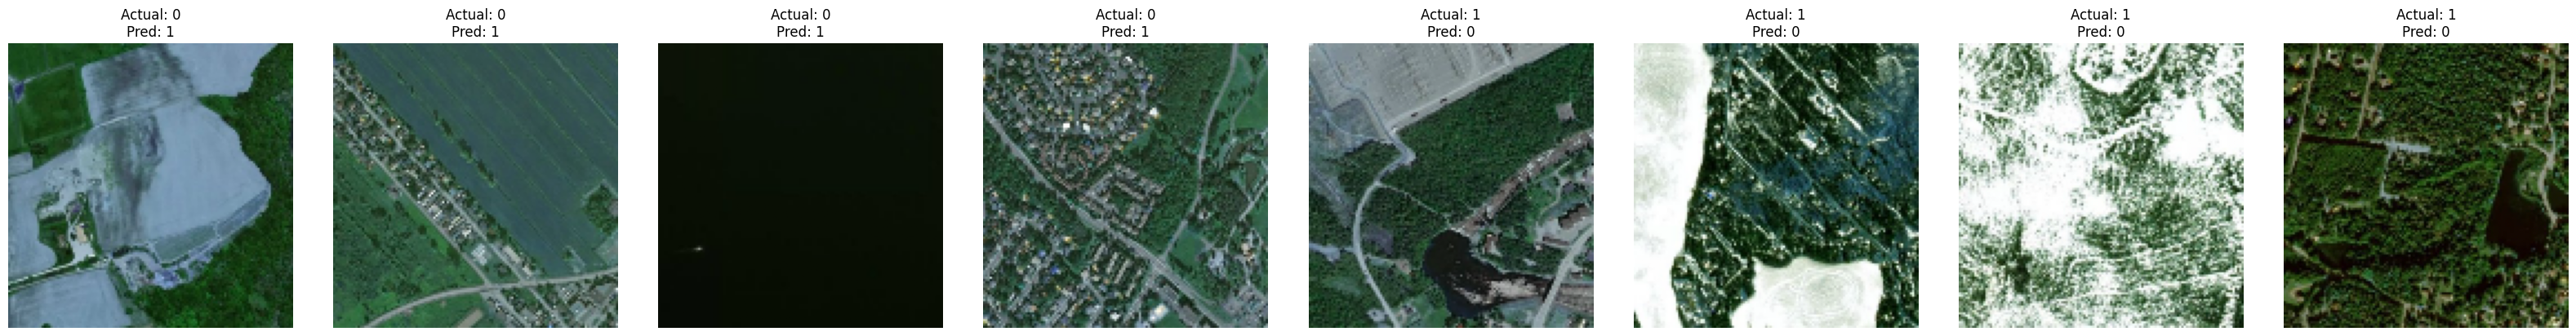

In [20]:
misclassified_indices = np.where(y_pred.flatten() != Y_test)[0]
num_misclassified = len(misclassified_indices)
print(f"\nNumber of misclassified images: {num_misclassified}")

if num_misclassified > 0:
    print("\nMisclassified Images:")

    # Split misclassified by class
    class_0_indices = [idx for idx in misclassified_indices if Y_test[idx] == 0]
    class_1_indices = [idx for idx in misclassified_indices if Y_test[idx] == 1]

    # Select up to 4 from each
    class_0_to_show = class_0_indices[:4]
    class_1_to_show = class_1_indices[:4]

    all_to_show = class_0_to_show + class_1_to_show
    num_to_show = len(all_to_show)

    fig, axes = plt.subplots(1, num_to_show, figsize=(4 * num_to_show, 4))

    # Always make axes iterable
    if num_to_show == 1:
        axes = [axes]

    for i, index in enumerate(all_to_show):
        axes[i].imshow(X_test[index], cmap='gray')
        axes[i].set_title(f"Actual: {Y_test[index]}\nPred: {y_pred[index][0]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images found.")


## Evaluate the model on the test set, show metrics, plot confusion matrix, and save the model


197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9341 - loss: 0.1841
Test Accuracy: 0.95
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9500    0.9291    0.9394      2820
           1     0.9435    0.9603    0.9519      3480

    accuracy                         0.9463      6300
   macro avg     0.9467    0.9447    0.9456      6300
weighted avg     0.9464    0.9463    0.9463      6300



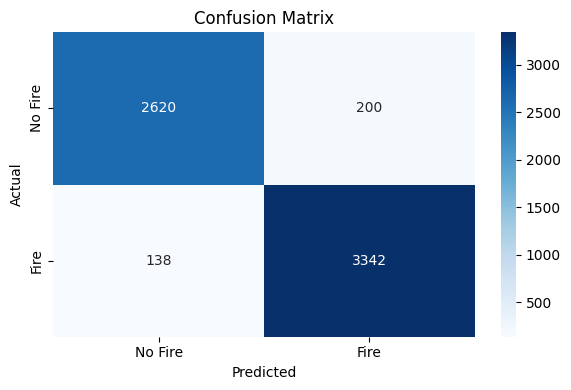

Model saved to ./wildfire_cnn_model.h5


In [15]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

model.save('./medium_model.h5')
print("Model saved to ./medium_model.h5")


 ## Conclusions
 * Really accurate model
 * Overfitting happens early
 * Add dropout layer